# STEP 1: LOAD AND EXPLORE DATA

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Load both CSV files
ontario_fsa = pd.read_csv('ontario_fsa.csv')
farmboy_stores = pd.read_csv('farmboy_stores.csv')

print("Ontario FSA Dataset:")
print(f"  Shape: {ontario_fsa.shape}")
print(f"  Columns: {ontario_fsa.columns.tolist()}")

print("\nFarm Boy Stores Dataset:")
print(f"  Shape: {farmboy_stores.shape}")
print(f"  Columns: {farmboy_stores.columns.tolist()}")

Ontario FSA Dataset:
  Shape: (520, 15)
  Columns: ['FSA', 'LANDAREA', "Bachelor's degree or higher", 'Car, truck or van - as a driver', 'Car, truck or van - as a passenger', 'Couple-family households', 'Employed', 'Employee', 'Median age of the population', 'Median total income of household in 2020 ($)', 'Permanent position', 'Population, 2021', 'Temporary position', 'With children', 'population_density']

Farm Boy Stores Dataset:
  Shape: (51, 2)
  Columns: ['Store Name', 'Address']


In [3]:
# Look at first few rows
print("\nOntario FSA sample:")
print(ontario_fsa.head())

print("\nFarm Boy Stores sample:")
print(farmboy_stores.head())


Ontario FSA sample:
   FSA   LANDAREA  Bachelor's degree or higher  \
0  K0A  3072.8212                      16495.0   
1  K0B  1223.8974                       1700.0   
2  K0C  2470.9420                       4200.0   
3  K0E  1979.2436                       2970.0   
4  K0G  2675.2361                       4445.0   

   Car, truck or van - as a driver  Car, truck or van - as a passenger  \
0                          33465.0                              2375.0   
1                           6985.0                               370.0   
2                          17335.0                              1065.0   
3                          13315.0                               730.0   
4                          11660.0                               860.0   

   Couple-family households  Employed  Employee  Median age of the population  \
0                   27880.0   57425.0   51445.0                          44.0   
1                    5200.0    9985.0    8670.0                        

In [4]:
# Check missing values
print("\nMissing values in Ontario FSA:")
print(ontario_fsa.isnull().sum())

# Get percentage of missing
missing_pct = (ontario_fsa.isnull().sum() / len(ontario_fsa)) * 100
print("\nMissing percentage:")
print(missing_pct[missing_pct > 0])


Missing values in Ontario FSA:
FSA                                             0
LANDAREA                                        0
Bachelor's degree or higher                     3
Car, truck or van - as a driver                 3
Car, truck or van - as a passenger              3
Couple-family households                        3
Employed                                        3
Employee                                        3
Median age of the population                    3
Median total income of household in 2020 ($)    4
Permanent position                              3
Population, 2021                                0
Temporary position                              3
With children                                   3
population_density                              0
dtype: int64

Missing percentage:
Bachelor's degree or higher                     0.576923
Car, truck or van - as a driver                 0.576923
Car, truck or van - as a passenger              0.576923
Couple-family

# STEP 2: EXTRACT FSAs FROM STORE ADDRESSES

In [5]:
farmboy_stores['FSA'] = farmboy_stores['Address'].str.extract(r'([A-Z]\d[A-Z])')

print("FSAs extracted:")
print(farmboy_stores[['Store Name', 'Address', 'FSA']].head())

FSAs extracted:
    Store Name                                            Address  FSA
0    Alderwood  841 Brown's Line, Shoppes of Alderwood, Toront...  M8W
1      Aukland             5245 Dundas St W, Toronto, ON, M9B 1A5  M9B
2       Aurora   10 Goulding Avenue, Unit A1, Aurora, ON, L4G 7B8  L4G
3    Barrhaven         3033 Woodroffe Avenue, Ottawa, ON, K2G 6H2  K2G
4  Beaverbrook       1415 Beaverbrook Avenue, London, ON, N6H 0J1  N6H


In [6]:
# Count unique FSAs
print(f"\nTotal stores: {len(farmboy_stores)}")
print(f"Unique FSAs: {farmboy_stores['FSA'].nunique()}")

# Check if any failed to extract
print(f"Missing FSAs: {farmboy_stores['FSA'].isnull().sum()}")

# Show FSA frequency (some FSAs might have multiple stores)
print("\nFSA frequency:")
print(farmboy_stores['FSA'].value_counts())


Total stores: 51
Unique FSAs: 50
Missing FSAs: 0

FSA frequency:
FSA
K2G    2
M8W    1
L2S    1
N5X    1
K2P    1
L3Y    1
L6H    1
K1E    1
L1K    1
L1V    1
L5H    1
K1N    1
K2T    1
M4T    1
M4M    1
K2S    1
M5E    1
K4A    1
K1G    1
L7M    1
N6E    1
K1Z    1
L1R    1
L4E    1
L4N    1
M4G    1
M9B    1
K7M    1
L4G    1
N6H    1
K1T    1
K1H    1
N3R    1
K2B    1
L6L    1
L7N    1
N1R    1
M5B    1
K6H    1
M6G    1
N2C    1
M5V    1
K2J    1
N1G    1
M5J    1
L9C    1
K1K    1
K2L    1
N2J    1
M4S    1
Name: count, dtype: int64


# STEP 3: CREATE DERIVED METRICS

In [7]:
# Education rate = (People with bachelor's+) / (Total population) * 100
ontario_fsa['education_rate'] = (
    ontario_fsa["Bachelor's degree or higher"] / 
    ontario_fsa['Population, 2021']
) * 100

print("Education rate calculated:")
print(ontario_fsa[['FSA', 'education_rate']].head())

Education rate calculated:
   FSA  education_rate
0  K0A       14.777023
1  K0B        8.087536
2  K0C        7.948825
3  K0E        7.490731
4  K0G       11.150971


In [8]:
# Employment rate = (Employed people) / (Total population) * 100
ontario_fsa['employment_rate'] = (
    ontario_fsa['Employed'] / 
    ontario_fsa['Population, 2021']
) * 100

print(f"Average employment rate: {ontario_fsa['employment_rate'].mean():.1f}%")

Average employment rate: 45.5%


In [9]:
# This is an approximation
# Assuming couple families represent households, with some adjustment
ontario_fsa['avg_household_size'] = (
    ontario_fsa['Population, 2021'] / 
    (ontario_fsa['Couple-family households'] + 1000)  # +1000 for singles/other
)

print(f"Average household size: {ontario_fsa['avg_household_size'].mean():.2f}")

Average household size: 3.94


# STEP 4: MARK STORE vs. NON-STORE FSAs

In [10]:
# Extract unique FSAs that have stores
store_fsas = farmboy_stores['FSA'].unique()

print(f"Number of unique store FSAs: {len(store_fsas)}")
print(f"Store FSAs: {sorted(store_fsas)}")

Number of unique store FSAs: 50
Store FSAs: ['K1E', 'K1G', 'K1H', 'K1K', 'K1N', 'K1T', 'K1Z', 'K2B', 'K2G', 'K2J', 'K2L', 'K2P', 'K2S', 'K2T', 'K4A', 'K6H', 'K7M', 'L1K', 'L1R', 'L1V', 'L2S', 'L3Y', 'L4E', 'L4G', 'L4N', 'L5H', 'L6H', 'L6L', 'L7M', 'L7N', 'L9C', 'M4G', 'M4M', 'M4S', 'M4T', 'M5B', 'M5E', 'M5J', 'M5V', 'M6G', 'M8W', 'M9B', 'N1G', 'N1R', 'N2C', 'N2J', 'N3R', 'N5X', 'N6E', 'N6H']


In [11]:
# Create 'has_store' column: True if FSA has a store, False otherwise
ontario_fsa['has_store'] = ontario_fsa['FSA'].isin(store_fsas)

print("\nFSAs by store presence:")
print(ontario_fsa['has_store'].value_counts())


FSAs by store presence:
has_store
False    470
True      50
Name: count, dtype: int64


In [12]:
# Create readable labels for visualizations
ontario_fsa['store_status'] = ontario_fsa['has_store'].map({
    True: 'With Store',
    False: 'Without Store'
})

print("\nStore status distribution:")
print(ontario_fsa['store_status'].value_counts())


Store status distribution:
store_status
Without Store    470
With Store        50
Name: count, dtype: int64


In [13]:
# Remove rows with missing data for fair comparison
ontario_fsa_clean = ontario_fsa.dropna()

print(f"\nOriginal FSAs: {len(ontario_fsa)}")
print(f"After removing missing: {len(ontario_fsa_clean)}")
print(f"  With stores: {ontario_fsa_clean['has_store'].sum()}")
print(f"  Without stores: {(~ontario_fsa_clean['has_store']).sum()}")


Original FSAs: 520
After removing missing: 516
  With stores: 50
  Without stores: 466


# STEP 5: PERFORM STATISTICAL COMPARISONS

In [14]:
# Split dataframe into two groups
with_stores = ontario_fsa_clean[ontario_fsa_clean['has_store'] == True]
without_stores = ontario_fsa_clean[ontario_fsa_clean['has_store'] == False]

print(f"With stores: {len(with_stores)} FSAs")
print(f"Without stores: {len(without_stores)} FSAs")

With stores: 50 FSAs
Without stores: 466 FSAs


In [15]:
# Define variables to compare
variables = [
    'Median total income of household in 2020 ($)',
    'population_density',
    'Population, 2021',
    'Median age of the population',
    'education_rate',
    'avg_household_size'
]

# Calculate means for each group
print("\nMean Comparison:")
print("-" * 70)
print(f"{'Variable':<40} {'With Stores':<15} {'Without Stores':<15}")
print("-" * 70)

for var in variables:
    mean_with = with_stores[var].mean()
    mean_without = without_stores[var].mean()
    print(f"{var:<40} {mean_with:>14,.1f} {mean_without:>14,.1f}")


Mean Comparison:
----------------------------------------------------------------------
Variable                                 With Stores     Without Stores 
----------------------------------------------------------------------
Median total income of household in 2020 ($)       99,164.0       93,777.9
population_density                              3,941.6        1,984.5
Population, 2021                               35,192.4       26,747.1
Median age of the population                       40.2           43.0
education_rate                                     27.2           18.0
avg_household_size                                  4.3            3.9


In [16]:
# Calculate percent difference for each variable
print("\nPercent Differences:")
print("-" * 70)

for var in variables:
    mean_with = with_stores[var].mean()
    mean_without = without_stores[var].mean()
    
    # Percent difference = (with - without) / without * 100
    pct_diff = ((mean_with - mean_without) / mean_without) * 100
    
    print(f"{var:<40} {pct_diff:>6.1f}%")


Percent Differences:
----------------------------------------------------------------------
Median total income of household in 2020 ($)    5.7%
population_density                         98.6%
Population, 2021                           31.6%
Median age of the population               -6.5%
education_rate                             50.7%
avg_household_size                          9.1%


In [17]:
# T-test compares if means are significantly different
print("\nStatistical Significance (T-Tests):")
print("-" * 70)
print(f"{'Variable':<40} {'T-statistic':<15} {'P-value':<15} {'Significant?'}")
print("-" * 70)

for var in variables:
    # Perform independent samples t-test
    t_stat, p_value = stats.ttest_ind(
        with_stores[var].dropna(),      # Group 1
        without_stores[var].dropna(),   # Group 2
        equal_var=False                 # Don't assume equal variances (safer)
    )
    
    # Determine significance level
    if p_value < 0.001:
        sig = "*** (p<0.001)"
    elif p_value < 0.01:
        sig = "** (p<0.01)"
    elif p_value < 0.05:
        sig = "* (p<0.05)"
    else:
        sig = "ns (p≥0.05)"
    
    print(f"{var:<40} {t_stat:>14.3f} {p_value:>14.6f} {sig}")


Statistical Significance (T-Tests):
----------------------------------------------------------------------
Variable                                 T-statistic     P-value         Significant?
----------------------------------------------------------------------
Median total income of household in 2020 ($)          1.582       0.118931 ns (p≥0.05)
population_density                                2.345       0.022906 * (p<0.05)
Population, 2021                                  2.971       0.004259 ** (p<0.01)
Median age of the population                     -4.482       0.000027 *** (p<0.001)
education_rate                                    5.175       0.000003 *** (p<0.001)
avg_household_size                                3.916       0.000166 *** (p<0.001)


# STEP 6: CALCULATE EFFECT SIZES

In [18]:
# Cohen's d = (Mean1 - Mean2) / Pooled Standard Deviation

print("\nEffect Sizes (Cohen's d):")
print("-" * 70)
print(f"{'Variable':<40} {'Cohen d':<12} {'Effect Size'}")
print("-" * 70)

for var in variables:
    # Calculate means
    mean_with = with_stores[var].mean()
    mean_without = without_stores[var].mean()
    
    # Calculate standard deviations
    std_with = with_stores[var].std()
    std_without = without_stores[var].std()
    
    # Calculate pooled standard deviation
    pooled_std = np.sqrt((std_with**2 + std_without**2) / 2)
    
    # Calculate Cohen's d
    cohens_d = (mean_with - mean_without) / pooled_std
    
    # Interpret effect size
    abs_d = abs(cohens_d)
    if abs_d < 0.2:
        effect = "Negligible"
    elif abs_d < 0.5:
        effect = "Small"
    elif abs_d < 0.8:
        effect = "Medium"
    else:
        effect = "Large"
    
    print(f"{var:<40} {cohens_d:>11.3f} {effect}")


Effect Sizes (Cohen's d):
----------------------------------------------------------------------
Variable                                 Cohen d      Effect Size
----------------------------------------------------------------------
Median total income of household in 2020 ($)       0.232 Small
population_density                             0.421 Small
Population, 2021                               0.440 Small
Median age of the population                  -0.572 Medium
education_rate                                 0.833 Large
avg_household_size                             0.418 Small


In [19]:
# Create comprehensive results table
results = []

for var in variables:
    # Calculate all statistics
    mean_with = with_stores[var].mean()
    mean_without = without_stores[var].mean()
    pct_diff = ((mean_with - mean_without) / mean_without) * 100
    
    t_stat, p_value = stats.ttest_ind(
        with_stores[var].dropna(),
        without_stores[var].dropna(),
        equal_var=False
    )
    
    std_with = with_stores[var].std()
    std_without = without_stores[var].std()
    pooled_std = np.sqrt((std_with**2 + std_without**2) / 2)
    cohens_d = (mean_with - mean_without) / pooled_std
    
    # Determine significance
    if p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    
    results.append({
        'Variable': var,
        'With Stores Mean': mean_with,
        'Without Stores Mean': mean_without,
        'Percent Difference': pct_diff,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Cohens d': cohens_d,
        'Significance': sig
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display
print("\nCOMPLETE RESULTS TABLE:")
print("=" * 80)
print(results_df.to_string(index=False))

# Save to CSV
results_df.to_csv('comparison_results.csv', index=False)
print("\n✓ Results saved to comparison_results.csv")


COMPLETE RESULTS TABLE:
                                    Variable  With Stores Mean  Without Stores Mean  Percent Difference  T-statistic  P-value  Cohens d Significance
Median total income of household in 2020 ($)      99164.000000         93777.896996            5.743467     1.581598 0.118931  0.232230           ns
                          population_density       3941.607062          1984.492786           98.620377     2.344518 0.022906  0.420510            *
                            Population, 2021      35192.420000         26747.141631           31.574508     2.970912 0.004259  0.439725           **
                Median age of the population         40.236000            43.049571           -6.535654    -4.481826 0.000027 -0.572169          ***
                              education_rate         27.202219            18.049468           50.709255     5.175091 0.000003  0.832908          ***
                          avg_household_size          4.266944             3.9103

# STEP 7: CREATE VISUALIZATIONS

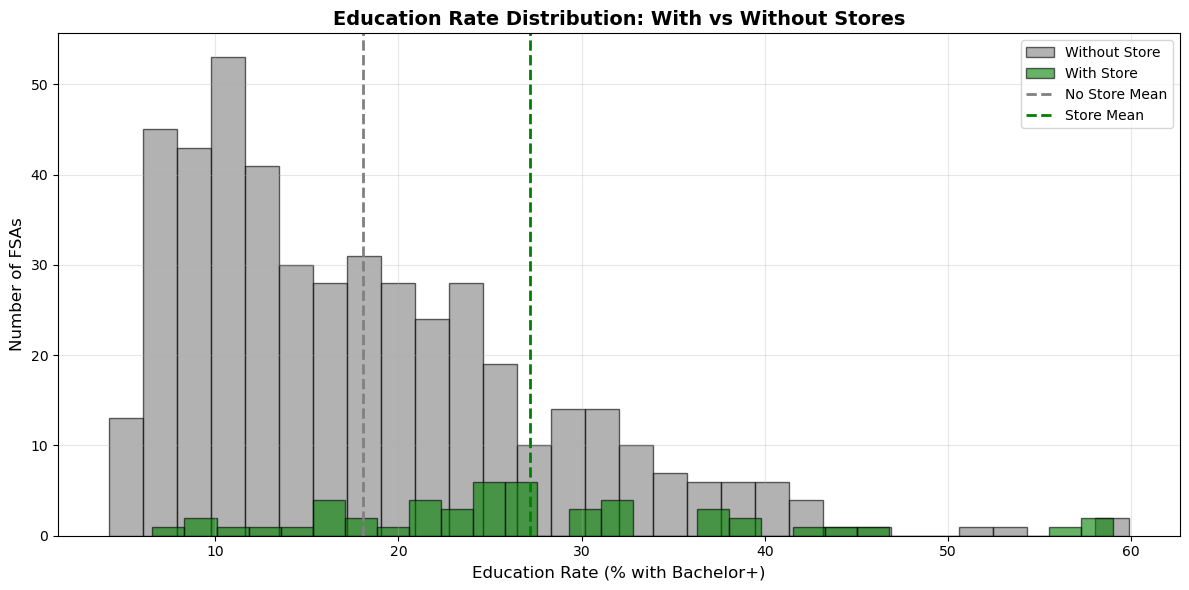

✓ Education comparison saved!


In [20]:
# Compare education rates between groups
plt.figure(figsize=(12, 6))

# Plot distributions
plt.hist(without_stores['education_rate'], bins=30, alpha=0.6, 
         label='Without Store', color='gray', edgecolor='black')
plt.hist(with_stores['education_rate'], bins=30, alpha=0.6, 
         label='With Store', color='green', edgecolor='black')

# Add mean lines
plt.axvline(without_stores['education_rate'].mean(), color='gray', 
            linestyle='--', linewidth=2, label='No Store Mean')
plt.axvline(with_stores['education_rate'].mean(), color='green', 
            linestyle='--', linewidth=2, label='Store Mean')

plt.xlabel('Education Rate (% with Bachelor+)', fontsize=12)
plt.ylabel('Number of FSAs', fontsize=12)
plt.title('Education Rate Distribution: With vs Without Stores', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('education_comparison.png', dpi=300)
plt.show()

print("✓ Education comparison saved!")

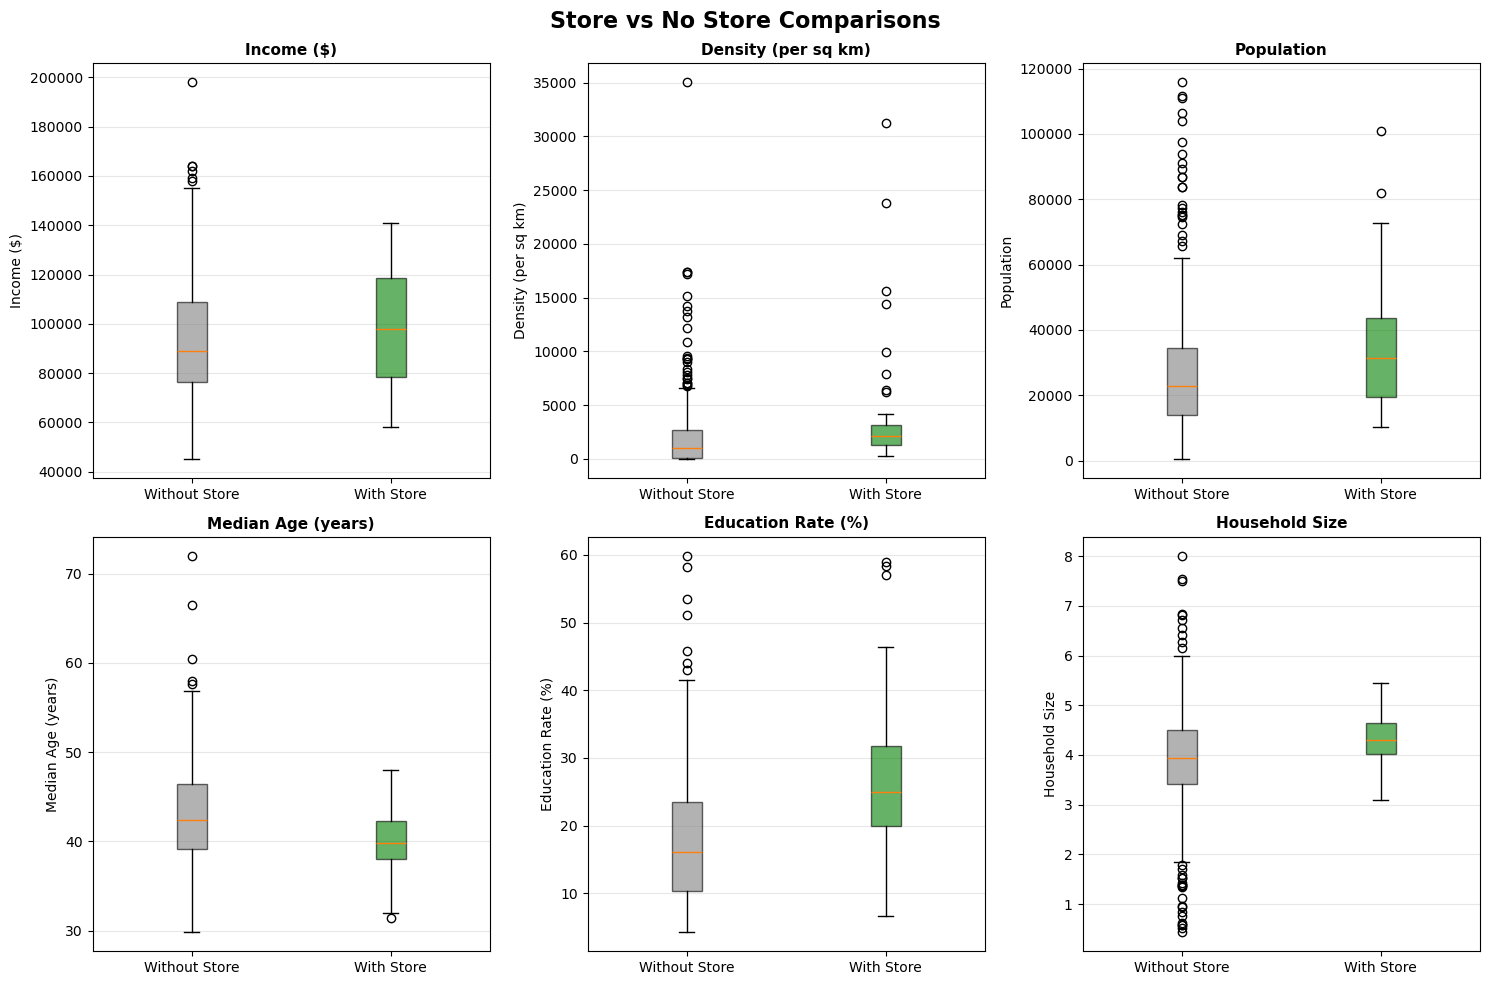

✓ Box plot comparison saved!


In [22]:
# Box plots show distribution better than histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Store vs No Store Comparisons', fontsize=16, fontweight='bold')

variables_short = [
    ('Median total income of household in 2020 ($)', 'Income ($)'),
    ('population_density', 'Density (per sq km)'),
    ('Population, 2021', 'Population'),
    ('Median age of the population', 'Median Age (years)'),
    ('education_rate', 'Education Rate (%)'),
    ('avg_household_size', 'Household Size')
]

for idx, (var, label) in enumerate(variables_short):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Prepare data for box plot
    data_to_plot = [
        without_stores[var].dropna(),
        with_stores[var].dropna()
    ]
    
    # Create box plot
    bp = ax.boxplot(data_to_plot, tick_labels=['Without Store', 'With Store'], 
                    patch_artist=True)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('gray')
    bp['boxes'][1].set_facecolor('green')
    bp['boxes'][0].set_alpha(0.6)
    bp['boxes'][1].set_alpha(0.6)
    
    ax.set_ylabel(label, fontsize=10)
    ax.grid(alpha=0.3, axis='y')
    ax.set_title(label, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('boxplot_comparisons.png', dpi=300)
plt.show()

print("✓ Box plot comparison saved!")

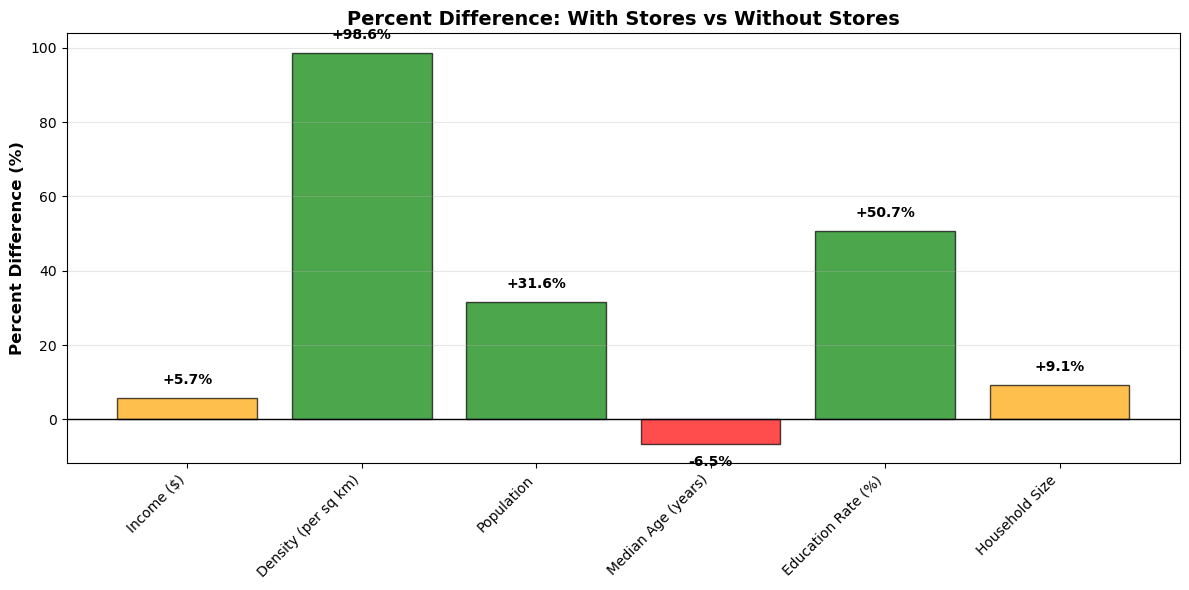

✓ Percent differences chart saved!


In [23]:
# Create bar chart of percent differences
plt.figure(figsize=(12, 6))

# Calculate percent differences
pct_diffs = {}
for var, label in variables_short:
    mean_with = with_stores[var].mean()
    mean_without = without_stores[var].mean()
    pct_diff = ((mean_with - mean_without) / mean_without) * 100
    pct_diffs[label] = pct_diff

# Create bar chart
labels = list(pct_diffs.keys())
values = list(pct_diffs.values())
colors = ['red' if v < 0 else 'green' if abs(v) > 30 else 'orange' for v in values]

bars = plt.bar(range(len(labels)), values, color=colors, alpha=0.7, edgecolor='black')

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylabel('Percent Difference (%)', fontsize=12, fontweight='bold')
plt.title('Percent Difference: With Stores vs Without Stores', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (3 if height > 0 else -3),
             f'{val:+.1f}%', ha='center', va='bottom' if height > 0 else 'top',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('percent_differences.png', dpi=300)
plt.show()

print("✓ Percent differences chart saved!")

# STEP 8: INTERPRET RESULTS

In [24]:
# Sort results by absolute effect size
results_sorted = results_df.copy()
results_sorted['Abs Effect Size'] = results_sorted['Cohens d'].abs()
results_sorted = results_sorted.sort_values('Abs Effect Size', ascending=False)

print("\nVARIABLES RANKED BY IMPORTANCE:")
print("=" * 80)
print(f"{'Rank':<6} {'Variable':<35} {'Effect Size':<12} {'Significance':<12} {'% Diff'}")
print("-" * 80)

for idx, row in results_sorted.iterrows():
    rank = results_sorted.index.get_loc(idx) + 1
    print(f"{rank:<6} {row['Variable']:<35} d={row['Cohens d']:>6.3f} {row['Significance']:<12} {row['Percent Difference']:>6.1f}%")


VARIABLES RANKED BY IMPORTANCE:
Rank   Variable                            Effect Size  Significance % Diff
--------------------------------------------------------------------------------
1      education_rate                      d= 0.833 ***            50.7%
2      Median age of the population        d=-0.572 ***            -6.5%
3      Population, 2021                    d= 0.440 **             31.6%
4      population_density                  d= 0.421 *              98.6%
5      avg_household_size                  d= 0.418 ***             9.1%
6      Median total income of household in 2020 ($) d= 0.232 ns              5.7%


In [26]:
print("\n" + "=" * 80)
print("CATEGORIZATION BY STRENGTH")
print("=" * 80)

# Strong predictors (large effect OR highly significant with medium effect)
strong = results_sorted[
    (results_sorted['Abs Effect Size'] >= 0.8) | 
    ((results_sorted['Abs Effect Size'] >= 0.5) & (results_sorted['P-value'] < 0.001))
]

print("\nSTRONG PREDICTORS:")
for idx, row in strong.iterrows():
    print(f"  • {row['Variable']}: d={row['Cohens d']:.3f}, {row['Significance']}")

# Moderate predictors
moderate = results_sorted[
    (results_sorted['Abs Effect Size'] >= 0.4) & 
    (results_sorted['Abs Effect Size'] < 0.8) &
    (results_sorted['P-value'] < 0.05)
]

print("\nMODERATE PREDICTORS:")
for idx, row in moderate.iterrows():
    print(f"  • {row['Variable']}: d={row['Cohens d']:.3f}, {row['Significance']}")

# Weak/insignificant predictors
weak = results_sorted[
    (results_sorted['Abs Effect Size'] < 0.4) | 
    (results_sorted['P-value'] >= 0.05)
]

print("\nWEAK/INSIGNIFICANT PREDICTORS:")
for idx, row in weak.iterrows():
    print(f"  • {row['Variable']}: d={row['Cohens d']:.3f}, {row['Significance']}")


CATEGORIZATION BY STRENGTH

STRONG PREDICTORS:
  • education_rate: d=0.833, ***
  • Median age of the population: d=-0.572, ***

MODERATE PREDICTORS:
  • Median age of the population: d=-0.572, ***
  • Population, 2021: d=0.440, **
  • population_density: d=0.421, *
  • avg_household_size: d=0.418, ***

WEAK/INSIGNIFICANT PREDICTORS:
  • Median total income of household in 2020 ($): d=0.232, ns


In [29]:
print("\n" + "=" * 80)
print("KEY INSIGHTS")
print("=" * 80)

# Find top predictor
top_predictor = results_sorted.iloc[0]
print(f"\n1. STRONGEST PREDICTOR: {top_predictor['Variable']}")
print(f"   • Effect size: d = {top_predictor['Cohens d']:.3f}")
print(f"   • Significance: {top_predictor['Significance']}")
print(f"   • Difference: {top_predictor['Percent Difference']:.1f}%")
print(f"   • With stores: {top_predictor['With Stores Mean']:.1f}")
print(f"   • Without stores: {top_predictor['Without Stores Mean']:.1f}")

# Find surprising result (high % difference but not significant, or vice versa)
for idx, row in results_sorted.iterrows():
    if abs(row['Percent Difference']) > 50 and row['P-value'] < 0.001:
        print(f"\n2. SURPRISING FINDING: {row['Variable']}")
        print(f"   • {abs(row['Percent Difference']):.1f}% difference - very large!")
        print(f"   • Highly significant (p < 0.001)")
        break

# Find non-significant high-value variable
for idx, row in results_sorted.iterrows():
    if 'income' in row['Variable'].lower() and row['P-value'] >= 0.05:
        print(f"\n3. UNEXPECTED: {row['Variable']} is NOT significant")
        print(f"   • Only {row['Percent Difference']:.1f}% difference")
        print(f"   • p = {row['P-value']:.3f} (not statistically significant)")
        print(f"   • Challenges assumption that income is primary driver")


KEY INSIGHTS

1. STRONGEST PREDICTOR: education_rate
   • Effect size: d = 0.833
   • Significance: ***
   • Difference: 50.7%
   • With stores: 27.2
   • Without stores: 18.0

2. SURPRISING FINDING: education_rate
   • 50.7% difference - very large!
   • Highly significant (p < 0.001)

3. UNEXPECTED: Median total income of household in 2020 ($) is NOT significant
   • Only 5.7% difference
   • p = 0.119 (not statistically significant)
   • Challenges assumption that income is primary driver
